In [61]:
#import basic libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(210, 241, 3)
(3500, 4000, 3)


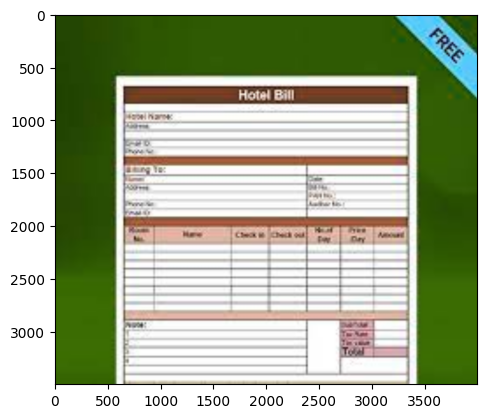

In [27]:
im_path="./bill2.jpg"
#read image from the path
img=cv2.imread(im_path)
print(img.shape)


#resize the image
img=cv2.resize(img, (4000,3500))
print(img.shape)

plt.imshow(img)
plt.show()

#converting BGR to  RGB

*Remove the noise
*Edge detection
*Contour extraction
*Best contour selection#
*Project to the screen

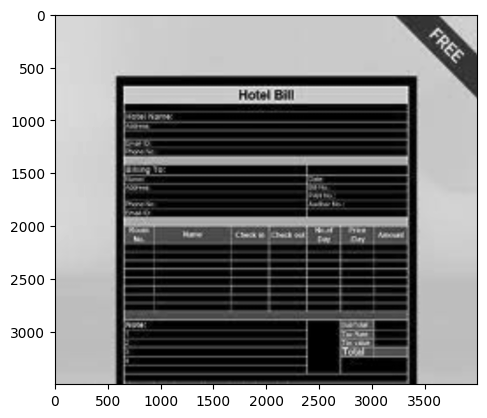

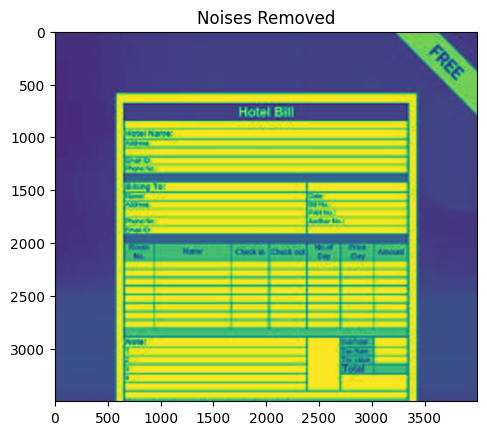

In [39]:
#remove noise-blur the image
original=img.copy()
gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='binary')
plt.show()

#blurring
plt.title("Noises Removed")
blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred)
plt.show()

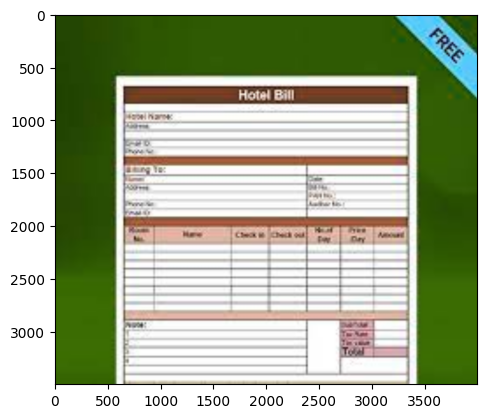

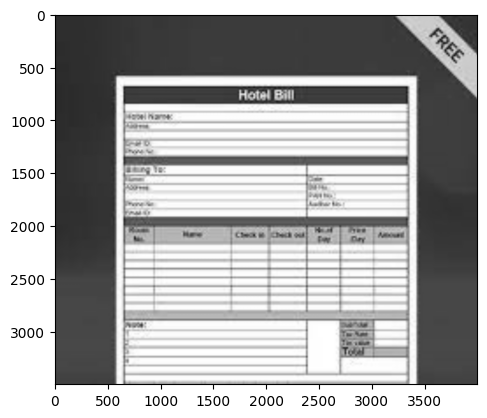

In [34]:
#regenerating the image
regen=cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(original)
plt.show()

#for showing regenerating image
plt.imshow(regen)
plt.show()

In [36]:
#for viewing the shape of he image
regen.shape

(3500, 4000, 3)

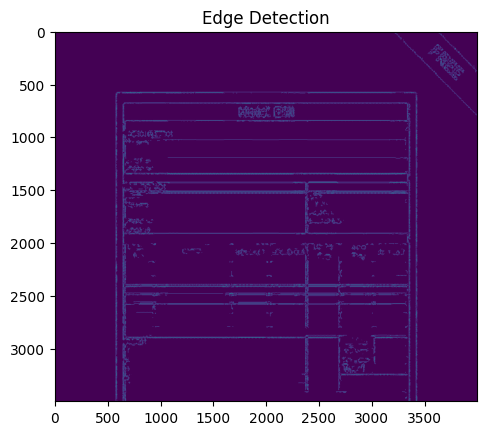

In [38]:
#PERFORM EDGE DETECTION
edge=cv2.Canny(blurred,0,50)
original_edge=edge.copy()
plt.title("Edge Detection")
plt.imshow(original_edge)
plt.show()


In [51]:
#Countour Extraction
#contour functions work on binary images to analyze the shape of the img
contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

#SORTING THE CONTOURS IN ORDER
contours=sorted(contours, reverse= True, key=cv2.contourArea)

20742


In [52]:
#SELECTING THE BEST CONTOURS
for c in contours:
    p=cv2.arcLength(c, True)
    approx=cv2.approxPolyDP(c,0.02*p, True)
    if len(approx)==4:
        target=approx
        break

print(target.shape)

(4, 1, 2)


In [53]:
#RE-ORDER THE TARGET CONTOUR
#h is the contour we have received
def reorder(h):
    h=h.reshape((4,2))
    print(h)
    hnew=np.zeros((4,2), dtype=np.float32)
    add=h.sum(axis=1)
    hnew[3]=h[np.argmax(add)]
    hnew[1]=h[np.argmax(add)]
    diff=np.diff(h,axis=1)
    hnew[0]=h[np.argmax(diff)]
    hnew[2]=h[np.argmax(diff)]
    return hnew

In [98]:

reorder = reorder(target)
print("*********")
print(reorder)

TypeError: 'numpy.ndarray' object is not callable

In [94]:
#PROJECTING TO THE SCREEN
#input_representation = reorder
source_points = np.float32([[550, 550], [3450, 550], [3450, 4000], [550, 4000]])
output_map=np.float32([[0, 0], [3999, 0], [3999, 2999], [0, 2999]])

In [95]:
M= cv2.getPerspectiveTransform(source_points, output_map)
ans=cv2.warpPerspective(original, M, (4000,3000))

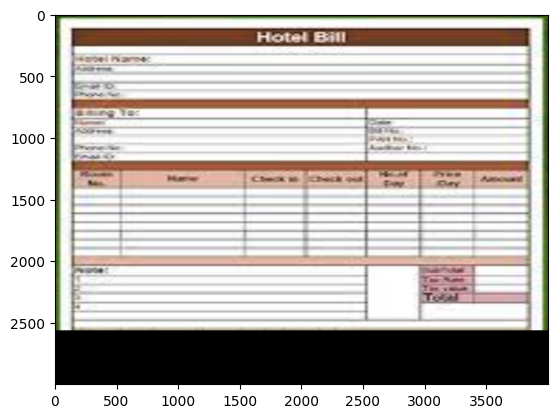

In [96]:

plt.imshow(ans)
plt.show()

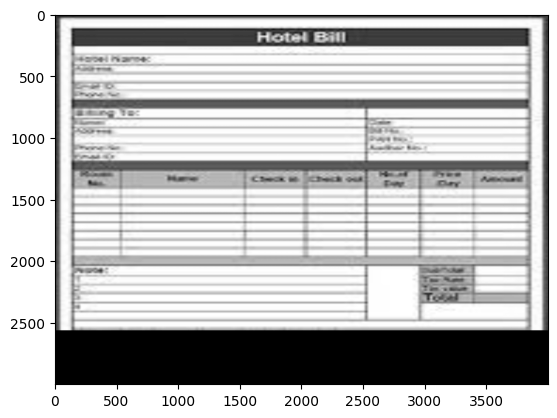

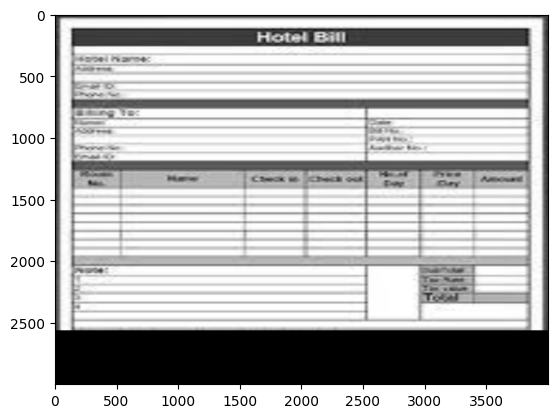

In [97]:
res=cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)
b_res=cv2.GaussianBlur(res,(3,3),0)
plt.imshow(res, cmap="gray")
plt.show()
plt.imshow(b_res, cmap="gray")
plt.show()